# Monitor de consulta

Describir las funciones del monitor


In [1]:
import os, json, yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import modulos.consultas as consultas
import modulos.utilidades as utils

from ipywidgets import widgets

In [2]:
# Paths absolutos
__file__ = 'monitor_consulta.ipynb'
CURRENT = os.path.dirname(os.path.abspath(__file__))
ROOT = os.path.dirname(CURRENT)

# Archivo de configuración
with open(os.path.join(ROOT, 'config.yaml'), 'r') as f:
    config = yaml.safe_load(f)
f.close()

# Paths de datos
TIEMPO_PATH = os.path.join(ROOT, config['datos']['tiempo'])
REGION_PATH = os.path.join(ROOT, config['datos']['region'])
RELACI_PATH = os.path.join(ROOT, config['etl']['relacionados'])

# Interés en el tiempo
Carga de datos

In [3]:
with open(file=TIEMPO_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Porcentaje de criterios consultados (PCC)

$$PCC = \frac{\#\{criterios\,consultados\}}{\#\{criterios\,búsqueda\}}$$

In [4]:
# Criterios búsqueda
with open(file=os.path.join(ROOT, config['datos']['criterios']), mode='r') as f:
    criterios_busqueda = [row.strip() for row in f]        
f.close()

# Criterios consultados
consultados = consultas.criterios_existentes(file=TIEMPO_PATH)

**PCC**

In [5]:
pcc_tiempo = len(consultados) / len(criterios_busqueda)
print(f'Pct. Criterios Consultados: {pcc_tiempo*100:.2f}%')

Pct. Criterios Consultados: 85.11%


## Exploración tabular


In [6]:
def ver_tiempo(criterio):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    
    return pd.DataFrame(consulta).head()

# consultas = list(contenido[0].keys())
# consultas.remove("criterio")

widgets.interact(ver_tiempo,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False)
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_tiempo(criterio)>

## Visualización inicial

In [7]:
def plot_tiempo(criterio):
    # Filtro de datos
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    consulta = contenido[idx_criterio]['contenidos']
    over_time = pd.DataFrame(consulta)
    over_time['fecha'] = pd.to_datetime(over_time['fecha'])
    
    # Visualización
    fig, ax = plt.subplots(figsize=(16,6))

    scatter = ax.scatter(x=over_time['fecha'], y=over_time['valor'], c=over_time['parcial'], cmap='Paired')
    ax.plot(over_time['fecha'], over_time['valor'], color='black', alpha=0.25)

    #Anotaciones y estilo
    ax.set_title(label=f'Interés a lo largo del tiempo - {criterio.title()}\nÚltimos {config["etl"]["anios"]} años', fontsize=14, loc='left')
    ax.legend(*scatter.legend_elements(), loc="upper left", title="Parcial")
    ax.grid(alpha=0.1)

    plt.show()

In [8]:
widgets.interact(plot_tiempo,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False)
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.plot_tiempo(criterio)>

# Interés región
Carga de datos

In [9]:
with open(file=REGION_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Porcentaje de criterios consultados (PCC)

$$PCC = \frac{\#\{criterios\,consultados\}}{\#\{criterios\,búsqueda\}}$$

In [10]:
# Criterios consultados
consultados = consultas.criterios_existentes(file=REGION_PATH)

**PCC**

In [11]:
pcc_tiempo = len(consultados) / len(criterios_busqueda)
print(f'Pct. Criterios Consultados: {pcc_tiempo*100:.2f}%')

Pct. Criterios Consultados: 100.00%


## Exploración tabular


In [12]:
def ver_region(criterio, periodo):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    consulta = consulta[periodo]['consulta']
    
    return pd.DataFrame(consulta).head()

widgets.interact(ver_region,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False),
                 periodo=widgets.IntSlider(
                     min=0,
                     max=len(contenido[0]["contenidos"])-1,
                     step=1,
                     description='Periodo')
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_region(criterio, periodo)>

# Temas relacionados
Carga de datos

In [13]:
with open(file=RELACI_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Inspección tabular

Esta sección es para tener un visualizador rápido de los datos de origen, para que se puede entender su estructura.

In [14]:
def ver_relacionados(criterio, periodo, tipo):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    consulta = consulta[periodo]['consulta']

    consulta = pd.DataFrame(consulta[tipo])
    
    return pd.DataFrame(consulta).head()

widgets.interact(
    ver_relacionados,
    criterio=widgets.Dropdown(
        options=[contenido[k]['criterio'] for k in range(len(contenido))],
        description='Criterio',
        disabled=False),
    periodo=widgets.IntSlider(
        min=0,
        max=len(contenido[0]["contenidos"])-1,
        step=1,
        description='Periodo'),
    tipo=widgets.Dropdown(
        options=['top','aumento'],
        description='Tipo',
        disabled=False)                
)

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_relacionados(criterio, periodo, tipo)>

## Análisis exploratorio

¿Cuántas palabras únicas hay en todo el corpus?

Independientemente del periodo del lote, el criterio de búsqueda, o si se trata de un tema relacionado top o en aumento, las palabras que han surgido en los resultados de búsqueda son:

In [15]:
corpus = list()
n_criterios = len(contenido)
for id_criterio in range(n_criterios):
    
    # Extraer lotes de consulta
    lotes = contenido[id_criterio]['contenidos']
    n_lotes = len(lotes)
    
    for id_lote in range(n_lotes):
        
        # Extraer el tipo de consulta del lote
        tipos = lotes[id_lote]['consulta']

        for tipo in tipos.keys():
            try:
                # Agregar token a corpus
                for doc_ in tipos[tipo]['descripcion'].values():
                    [corpus.append(word) for word in doc_ if word not in corpus]

            except TypeError:
                continue

corpus = {'token':corpus}
len(corpus['token'])

1236

### Frecuencia de palabras

Dado que se estructuraron las cosas de modo que se pudiera hacer un análisis por lotes de tiempo, entonces el análisis de n-gramas debe satisfacer esta característica.

Para efectos de análisis, primero se deben consolidar las consultas por lote de tiempo en una sola tabla, para ello:

In [16]:
criterios_lote = utils.tabla_temas_relacionados(obj_json=contenido, id_lote=0)
criterios_lote.head()

,descripcion,tipo,inicio,fin,lote,criterio,id_criterio
0,"[red, social]",aumento,2022-11-20,2023-02-20,0,inai,0
1,"[constitucion, politica, unidos, mexicanos]",aumento,2022-11-20,2023-02-20,0,inai,0
2,"[archivo, documentos]",aumento,2022-11-20,2023-02-20,0,inai,0
3,[clasificacion],aumento,2022-11-20,2023-02-20,0,inai,0
4,"[consejo, nacional, prevenir, discriminacion]",aumento,2022-11-20,2023-02-20,0,inai,0


Ahora es necesario generar un corpus relativo al lote, para ello se definen dos objetos:

* `corpus`: El corpus del lote, es decir, los tokens únicos de todos los documentos de todos los criterios de búsqueda para un lote dado
* `docs_`: Un arreglo con todos los tokens enlistados aún cuando existan repetidos

In [17]:
docs_ = (
    criterios_lote
    .descripcion
    .explode()
)

corpus = pd.DataFrame(
    docs_
    .value_counts(ascending=True)
    .reset_index()
    .set_axis(['token','cuenta'], axis='columns')
    .assign(
        prop = lambda df_: df_.cuenta / df_.cuenta.sum(),
        cum_prop = lambda df_: df_.prop.cumsum(),
        f = lambda df_: (df_.index)/df_.index.max()
    )
)

corpus

,token,cuenta,prop,cum_prop,f
0,vulnerabilidad,1,0.000657,0.000657,0.000000
1,hoja,1,0.000657,0.001314,0.002336
2,estudios,1,0.000657,0.001971,0.004673
3,superiores,1,0.000657,0.002628,0.007009
4,iztacala,1,0.000657,0.003285,0.009346
...,...,...,...,...,...
424,seguro,28,0.018397,0.891590,0.990654
425,derecho,30,0.019711,0.911301,0.992991
426,instituto,43,0.028252,0.939553,0.995327
427,social,43,0.028252,0.967806,0.997664


Ahora se hacen algunas visualizaciones interesantes:

**Código para visualizaciones estáticas**

```python
# Especificaciones generales
fig = plt.figure(figsize=(15,5))
gs = plt.GridSpec(nrows=1, ncols=3, figure=fig, wspace=0.2, hspace=0.2)

# ---- Primera gráfica del grid ----
n = 15
cum_prop = corpus.tail(n).prop.sum()

# Espacio en figura general
ax1 = fig.add_subplot(gs[0,:2])

# Visualización
ax1.barh(
    y=corpus.tail(n).token
    ,width=corpus.tail(n).cuenta
    ,color=config['main']['tema']['verde']
)

# Anotaciones y estilo
ax1.set_title(
    f'En los primeros {n} tokens con más ocurrencias,\nse acumula el {cum_prop*100:.0f}% de las ocurrencias totales del lote'
    ,loc='left')
ax1.set_xlabel('Cuenta')
ax1.grid(axis='x', alpha=0.1)

# ---- Segunda gráfica del grid ----

# # Espacio en figura general
ax2 = fig.add_subplot(gs[:,2])

ax2.scatter(
    x=corpus.f
    ,y=corpus.cuenta
    ,s=20
    ,color=config['main']['tema']['morado']
    ,alpha=0.25
)

# Anotaciones y estilo
ax2.set_title('Distribución de ocurrencias por token', loc='left')
ax2.set_xlabel('Proporción de tokens')
ax2.set_ylabel('Ocurrencias')
ax2.set_xticks(np.arange(0,1.1,0.1))
ax2.grid(alpha=0.1)

plt.show()
```


In [18]:
def explorar_lote(id_lote, n_var):
    # Construir tabla de datos
    docs_ = utils.tabla_temas_relacionados(obj_json=contenido, id_lote=id_lote)
    
    # Obtener todos los tokens
    docs_ = (
        docs_
        .descripcion
        .explode())
    # Obtener corpus
    corpus = pd.DataFrame(
        docs_
        .value_counts(ascending=True)
        .reset_index()
        .set_axis(['token','cuenta'], axis='columns')
        .assign(
            prop = lambda df_: df_.cuenta / df_.cuenta.sum(),
            cum_prop = lambda df_: df_.prop.cumsum(),
            f = lambda df_: (df_.index)/df_.index.max())
    )
    
    # Visualización
    # Especificaciones generales
    fig = plt.figure(figsize=(15,5))
    gs = plt.GridSpec(nrows=1, ncols=3, figure=fig, wspace=0.2, hspace=0.2)

    # ---- Primera gráfica del grid ----
    n = n_var
    cum_prop = corpus.tail(n).prop.sum()

    # Espacio en figura general
    ax1 = fig.add_subplot(gs[0,:2])

    # Visualización
    ax1.barh(
        y=corpus.tail(n).token
        ,width=corpus.tail(n).cuenta
        ,color=config['main']['tema']['verde']
    )

    # Anotaciones y estilo
    ax1.set_title(
        f'En los primeros {n} tokens con más ocurrencias,\nse acumula el {cum_prop*100:.0f}% de las ocurrencias totales del lote'
        ,loc='left')
    ax1.set_xlabel('Cuenta')
    ax1.grid(axis='x', alpha=0.1)

    # ---- Segunda gráfica del grid ----

    # # Espacio en figura general
    ax2 = fig.add_subplot(gs[:,2])

    ax2.scatter(
        x=corpus.f
        ,y=corpus.cuenta
        ,s=20
        ,color=config['main']['tema']['morado']
        ,alpha=0.25
    )

    # Anotaciones y estilo
    ax2.set_title('Distribución de ocurrencias por token', loc='left')
    ax2.set_xlabel('Proporción de tokens')
    ax2.set_ylabel('Ocurrencias')
    ax2.set_xticks(np.arange(0,1.1,0.1))
    ax2.grid(alpha=0.1)

    plt.show()
    
widgets.interact(explorar_lote,
                 id_lote=widgets.IntSlider(min=0, max=len(contenido[0]['contenidos'])-1, step=1, description='Lote'),
                 n_var=widgets.IntSlider(value=15, min=10, max=25, step=1, description='Num. Vars.')
                )

interactive(children=(IntSlider(value=0, description='Lote', max=7), IntSlider(value=15, description='Num. Var…

<function __main__.explorar_lote(id_lote, n_var)>

### Grafo de conexiones simples

Para la exploración de los grafos que se generan en los distintos criterios de búsqueda, es necesario definir primero un criterio de conexión entre criterios. El caso más simple es aquel en el que se considera una conexión entre nodos, cuando se tiene un **al menos un token en común**.

dicionalmente, este análisis se puede estratificar por el tipo de consulta realizada, es decir, si se trata de temas `top` o temas en `aumento`

In [37]:
# Cargar todos los datos del lote
criterios_lote = utils.tabla_temas_relacionados(obj_json=contenido, id_lote=0)

# Estratificar el lote por tipo de consulta
criterios_lote = (
    criterios_lote
    .query("tipo=='top'")
    .set_index('id_criterio'))

# Se crea objeto para almacenar coincidencias
n_grafo = criterios_lote.index.max()
grafo = np.zeros(shape=(n_grafo+1, n_grafo+1))

# Iterador de criterio
for id_criterio in range(n_grafo+1):

    # Eliminar criterio evaluado de conjunto objetivo
    docs_ = (
        criterios_lote
        .query(f"id_criterio!={id_criterio}")
        .descripcion
        .explode())

    # Extraer el criterio que será evaluado
    mask_ = (
        criterios_lote
        .query(f"id_criterio=={id_criterio}")
        .descripcion
        .explode())

    # Evaluar si existe al menos una coincidendia
    ids_ = (
        docs_
        .isin(mask_)
        .index
        .unique()
        .to_numpy()
    )

    grafo[ids_, id_criterio] = 1

grafo

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

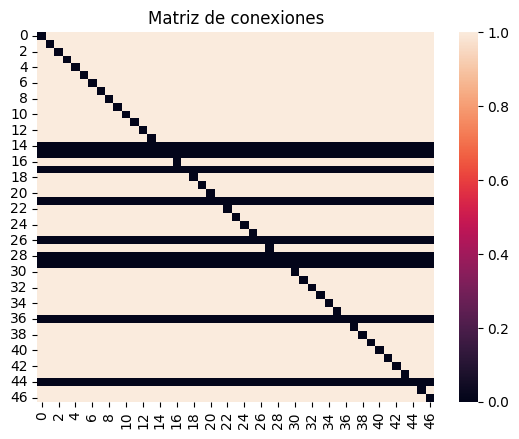

In [42]:
# Figura
fig, ax = plt.subplots()
sns.heatmap(grafo, ax=ax)

# Anotaciones y estilo
ax.set_title('Matriz de conexiones')

plt.show()

In [48]:
grafo[14,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])